In [10]:
import numpy as np
from matplotlib.pyplot import *
from spectral import imshow, view_cube
import spectral.io.envi as envi 
from pysptools import spectro, noise 
from skimage import io
from VCA import *
%matplotlib widget

In [2]:
find_index = lambda x, wvls: np.argmin(np.abs(wvls - x), axis = 0)

In [3]:
sample_image = io.imread(r'D:/Data/Data_HSI/CRAS-Dia2/Sample Images/santonio.jpeg')

In [4]:
fpath = r'D:/Data/Data_HSI/CRAS-Dia2/Refletancia/'
fname_wref = r'1 - Ref Branco/conversion_output/post_processing/ref_branco_dark_current_compensation_radiometric_correction'
fname_dref = r'2 - Ref Preto/conversion_output/post_processing/ref_preto_dark_current_compensation_radiometric_correction'
# fname_dref = r'3 - Vidro Verde/conversion_output/2024-02-28T12_53_51+0000_dark_frames'
fname_ref = r'3 - Santo Antonio/conversion_output/post_processing/santo_antonio_dark_current_compensation_radiometric_correction'

In [5]:
white_ref = envi.open(fpath + fname_wref + '.hdr', fpath + fname_wref + '.img')
dark_ref = envi.open(fpath + fname_dref + '.hdr', fpath + fname_dref + '.img')
data_ref = envi.open(fpath + fname_ref + '.hdr', fpath + fname_ref + '.img')

In [6]:
white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

In [7]:
mask_W = white_nparr[100:1000, :, 150] > 0.045
ref_white = white_nparr[100:1000, :, :][mask_W].mean(axis = 0)
mask_D = dark_nparr[:, :, 150] < 0.001
ref_dark = dark_nparr[mask_D].mean(axis = 0)

In [37]:
# corrected_nparr = ((data_nparr - ref_dark)/(ref_white - ref_dark))[50:950, 230:520, :]
corrected_nparr = data_nparr[50:950, 230:520, :]
data_reg = corrected_nparr
bands = np.array(data_ref.bands.centers)

In [38]:
specim_fps = 10
stage_speed = 1e-3
y_size = corrected_nparr.shape[0]/specim_fps*stage_speed * 1e2 #cm
x_size = 0.11* 1e2 #cm

In [45]:
data_total = data_reg.reshape(data_reg.shape[0]*data_reg.shape[1], -1).T
Ae, indice, Yp = vca(data_total, 6)

SNR estimated = 35.67718251276846[dB]
... Select the projective proj.


c:\Users\tomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


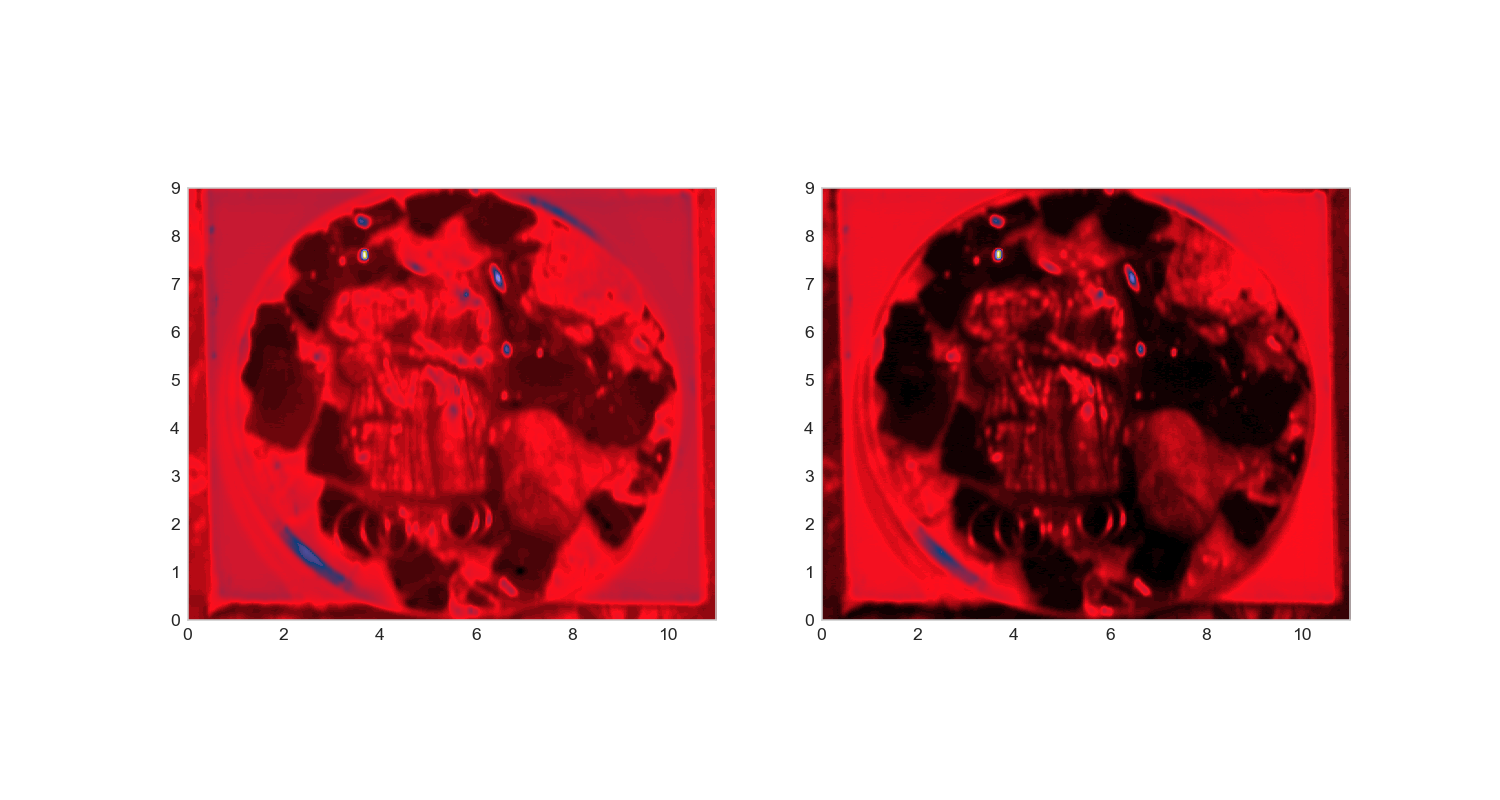

In [46]:
fig, ax = subplots(1, 2, figsize = (15, 8))

axs = ax[0]
axs.imshow(Yp.T.reshape(data_reg.shape)[:, :, find_index(450, bands)], cmap = 'gist_stern', extent = (0, x_size, 0, y_size))
axs.grid(False)

axs = ax[1]
axs.imshow(data_reg[:, :, find_index(450, bands)], cmap = 'gist_stern', extent = (0, x_size, 0, y_size))
axs.grid(False)

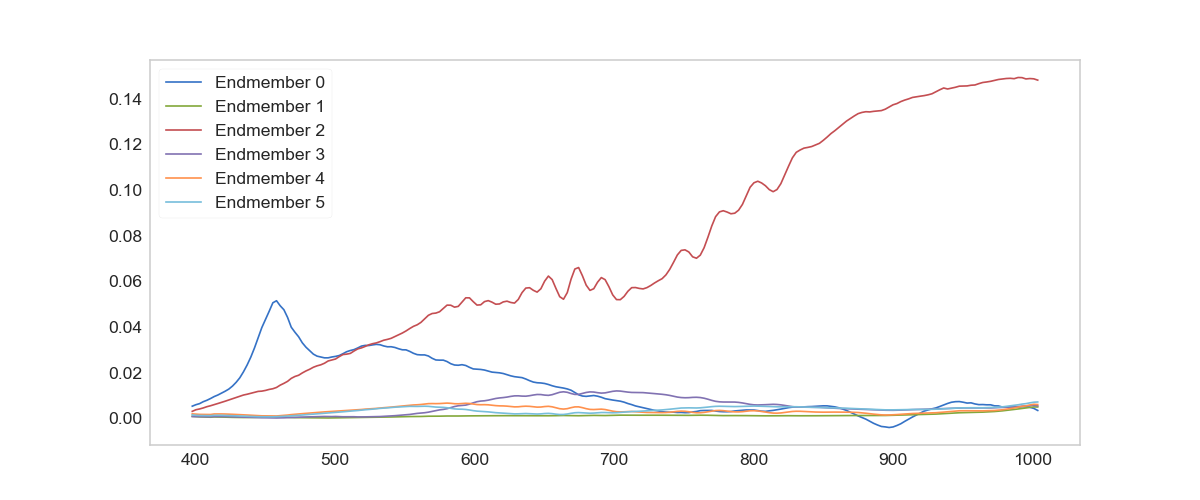

In [47]:
fig, ax = subplots(figsize = (12, 5))

for i in range(Ae.shape[1]):
    ax.plot(bands, Ae[:, i], label = 'Endmember ' + str(i))

ax.legend()
ax.grid(False)